Name: Shiska Raut <br>
ID: 1001526329

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Provide file path

In [61]:
file_path = 'UCI_datasets/satellite_training.txt'

In [62]:
# read data
df = pd.read_csv(file_path, sep=' ', lineterminator='\n', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4435 non-null   int64
 1   1       4435 non-null   int64
 2   2       4435 non-null   int64
 3   3       4435 non-null   int64
 4   4       4435 non-null   int64
 5   5       4435 non-null   int64
 6   6       4435 non-null   int64
 7   7       4435 non-null   int64
 8   8       4435 non-null   int64
 9   9       4435 non-null   int64
 10  10      4435 non-null   int64
 11  11      4435 non-null   int64
 12  12      4435 non-null   int64
 13  13      4435 non-null   int64
 14  14      4435 non-null   int64
 15  15      4435 non-null   int64
 16  16      4435 non-null   int64
 17  17      4435 non-null   int64
 18  18      4435 non-null   int64
 19  19      4435 non-null   int64
 20  20      4435 non-null   int64
 21  21      4435 non-null   int64
 22  22      4435 non-null   int64
 23  23      4435 

In [64]:
# drop last column
df.drop([36], axis = 1, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


#### Convert dataframe to numpy array

In [65]:
data_arr = df.to_numpy()

# get number of samples and features
n_samp, n_feat = data_arr.shape

## K Means

#### Helper Functions

In [66]:
# computes centroids given cluster assignments
def calculate_cluster_centroids(cluster_assignments):
    # get number of clusters
    n_c = max(cluster_assignments) + 1

    # dictionary to store new centroids
    centroids_dict = {}

    # compute centroids using cluster assignments
    for cluster_number in range(n_c):

        # use array slicing to get datapoints belonging to cluster
        x = data_arr[cluster_assignments == cluster_number]

        # if there are no datapoints assignd to the cluster
        if x.shape[0] != 0:
            centroids_dict[cluster_number] = (np.sum(x, axis=0) / x.shape[0]).reshape(1, n_feat)
        else:
            centroids_dict[cluster_number] = np.sum(x, axis=0).reshape(1, n_feat)

    return centroids_dict


# initalizes cluster centroids using random parition method
def initialize_centroids(k):
    # dictionary to store centroids
    centroids_dict = {}

    # randomly assign datapoints to a cluster
    random_cluster_assignments = np.random.randint(low=0, high=k, size=(n_samp,), dtype=int)

    # return cluster centroids for random assignments
    return calculate_cluster_centroids(random_cluster_assignments)


# gets new cluster assignments given centroids using euclidean distance
def update_cluster_assignments(centroids_dict):
    # get number of clusters
    n_c = len(centroids_dict.keys())

    # array to store distance from each cluster
    dist_arr = np.zeros((n_samp, n_c), dtype=float)

    # caluclate euclidean distance from each centroid
    for cluster_number in range(n_c):
        dist_arr[:, cluster_number] = np.sqrt(np.sum((data_arr - centroids_dict[cluster_number]) ** 2, axis =1))

    # for each sample, index of the column of the lowest distance is closest cluster
    # and hence the cluster assignment
    cluster_assignments = np.argmin(dist_arr, axis = 1)

    return cluster_assignments


# calculates SSE error given final cluster assignments
def get_SSE(cluster_assignments):
    # compute centroids
    n_c = max(cluster_assignments) + 1

    # dictionary to store final centroids for computing SSE
    final_centroids_dict = calculate_cluster_centroids(cluster_assignments)

    SSE = 0

    for cluster_number in range(n_c):
        # use array slicing to get datapoints belonging to cluster
        x = data_arr[cluster_assignments == cluster_number]

        # compute euclidean distance
        dist_arr = np.sqrt(np.sum((x - final_centroids_dict[cluster_number]) ** 2, axis=1))

        # add sum of distances to sse
        SSE += np.sum(dist_arr)

    return SSE

### Clustering algorithm

In [67]:
# given an unlabeled data, returns k number of clusters
def get_kmeans_clusters(k):
    # initalize cluster centroids
    cluster_centroids_dict = initialize_centroids(k)

    # get new cluster assignments
    prev_cluster_assignments = update_cluster_assignments(cluster_centroids_dict)

    # i to count iterations
    i = 0
    SSE_final = 0  # final SSE
    SSE_20 = 0  # SSE after 20th iteration

    while True:

        # compute centroids
        cluster_centroids_dict = calculate_cluster_centroids(prev_cluster_assignments)

        if i == 19:
            SSE_20 = get_SSE(prev_cluster_assignments)

        # get new cluster assignments
        cluster_assignments = update_cluster_assignments(cluster_centroids_dict)

        # if new assignments is same as the old assignments, stop
        if (prev_cluster_assignments == cluster_assignments).all():
            break

        # save new assignments
        prev_cluster_assignments = cluster_assignments

        # increment i
        i += 1

    # get error
    SSE_final = get_SSE(cluster_assignments)

    # return final cluster assignments, sse after 20th iteration and final SSE
    return cluster_assignments, SSE_20, SSE_final

#### Get SSE values for k = 2 to 10

In [68]:
# initialize cluster numbers
k_values = list(np.arange(2, 11))

# list to store SSE values
SSE_values_20 = []          # after 20th iteration
SSE_values_final = []       # after final iteration

for k in k_values:
    __, sse_20, sse_final = get_kmeans_clusters(k)
    SSE_values_20.append(sse_20)
    SSE_values_final.append(sse_final)

### Print Results

In [75]:
for i in range(len(SSE_values_20)):
    print(f'SSE for {k_values[i]} clusters after 20 iterations is {SSE_values_20[i]:0.4f}.')  

SSE for 2 clusters after 20 iterations is 0.0000.
SSE for 3 clusters after 20 iterations is 0.0000.
SSE for 4 clusters after 20 iterations is 0.0000.
SSE for 5 clusters after 20 iterations is 0.0000.
SSE for 6 clusters after 20 iterations is 201835.2001.
SSE for 7 clusters after 20 iterations is 193738.8800.
SSE for 8 clusters after 20 iterations is 0.0000.
SSE for 9 clusters after 20 iterations is 189548.6008.
SSE for 10 clusters after 20 iterations is 174151.5544.
SSE for 11 clusters after 20 iterations is 176429.1886.
SSE for 12 clusters after 20 iterations is 170510.5188.
SSE for 13 clusters after 20 iterations is 173277.7393.
SSE for 14 clusters after 20 iterations is 165753.6876.
SSE for 15 clusters after 20 iterations is 161861.8175.
SSE for 16 clusters after 20 iterations is 166818.8667.
SSE for 17 clusters after 20 iterations is 159382.0228.
SSE for 18 clusters after 20 iterations is 158905.7386.
SSE for 19 clusters after 20 iterations is 160169.6789.


In [76]:
for i in range(len(SSE_values_final)):
    print(f'SSE for {k_values[i]} clusters after convergence is {SSE_values_final[i]:0.4f}.')

SSE for 2 clusters after convergence is 334705.4102.
SSE for 3 clusters after convergence is 260000.9820.
SSE for 4 clusters after convergence is 235293.1244.
SSE for 5 clusters after convergence is 215145.2318.
SSE for 6 clusters after convergence is 201650.0480.
SSE for 7 clusters after convergence is 192338.7013.
SSE for 8 clusters after convergence is 185993.8676.
SSE for 9 clusters after convergence is 189032.4760.
SSE for 10 clusters after convergence is 174161.6113.
SSE for 11 clusters after convergence is 176429.8892.
SSE for 12 clusters after convergence is 169593.2730.
SSE for 13 clusters after convergence is 168719.1624.
SSE for 14 clusters after convergence is 163893.7289.
SSE for 15 clusters after convergence is 161737.7262.
SSE for 16 clusters after convergence is 165809.4772.
SSE for 17 clusters after convergence is 158759.2806.
SSE for 18 clusters after convergence is 158907.1912.
SSE for 19 clusters after convergence is 159111.3848.


### Plot Results

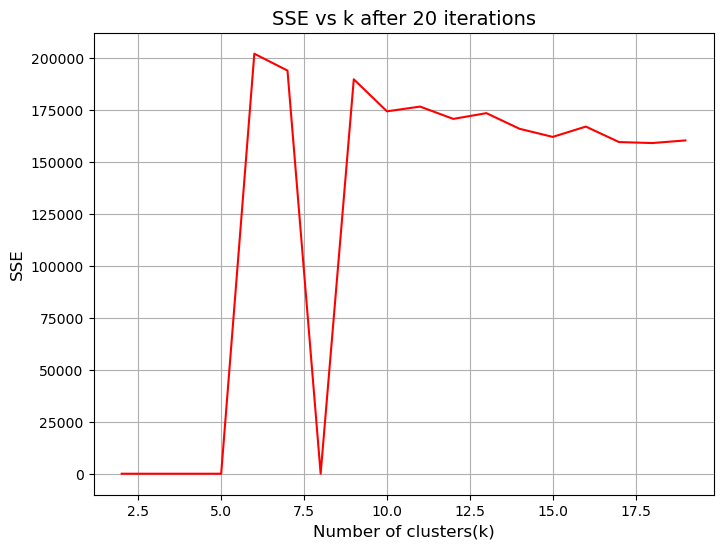

In [77]:
plt.figure(figsize = (8, 6))
plt.plot(k_values, SSE_values_20, color = 'red')

# add title and labels
plt.title('SSE vs k after 20 iterations', fontdict = {'fontsize': 14})
plt.xlabel('Number of clusters(k)', fontdict = {'fontsize': 12})
plt.ylabel('SSE', fontdict = {'fontsize': 12})
plt.grid()

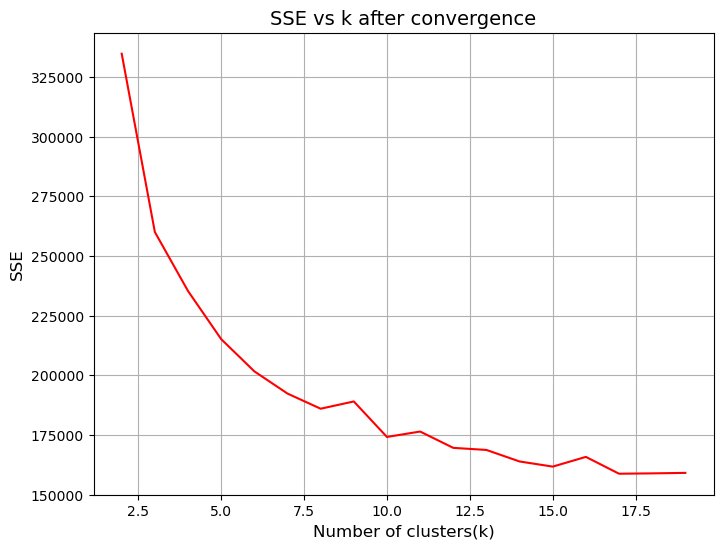

In [78]:
plt.figure(figsize = (8, 6))
plt.plot(k_values, SSE_values_final, color = 'red')

# add title and labels
plt.title('SSE vs k after convergence', fontdict = {'fontsize': 14})
plt.xlabel('Number of clusters(k)', fontdict = {'fontsize': 12})
plt.ylabel('SSE', fontdict = {'fontsize': 12})
plt.grid()